# La ley de los grandes números

Vamos a simular 10 series de 10000 tiradas de moneda con una probabilidad de cara del 51%.

In [1]:
import numpy as np

In [2]:
prob_cara = 0.51

tiradas = (np.random.rand(10000,10) < prob_cara).astype(np.int32)
# Me genera números aleatorios entre 0 y 1 (en 10 tandas de 10000).
# Es decir, una matriz 100000x10 de números aleatorios entre 0 y 1
# Me los convierte en Trues y Falses
# Y luego me los convierte en 1 y 0

In [3]:
tiradas

array([[1, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [4]:
tiradas_acumuladas= np.cumsum(tiradas, axis=0) / np.arange(1,10001).reshape(-1,1)

# cumsum con axis=0 me va sumando en cada fila
# reshape(-1,1) me lo traspone y me lo saca como lista
# Divido la primera fila entre 1, la segunda entre 2, etc.
# Es decir, a qué tiende Caras/Tiradas cuando Tiradas tiende a 10000

In [5]:
tiradas_acumuladas

array([[1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 1.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.66666667, 0.        , 1.        , ..., 0.66666667, 0.33333333,
        0.66666667],
       ...,
       [0.51620324, 0.50670134, 0.50830166, ..., 0.50880176, 0.50670134,
        0.505001  ],
       [0.51615162, 0.50665067, 0.50825083, ..., 0.50885089, 0.50675068,
        0.5049505 ],
       [0.5162    , 0.5067    , 0.5083    , ..., 0.5089    , 0.5068    ,
        0.505     ]])

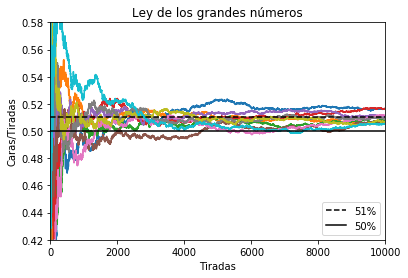

In [7]:
from matplotlib import pyplot as plt

plt.plot(tiradas_acumuladas)
plt.plot([0,10000],[0.51,0.51], 'k--', label='51%')
plt.plot([0,10000],[0.50,0.50], 'k-', label='50%')
plt.title('Ley de los grandes números')
plt.xlabel('Tiradas')
plt.ylabel('Caras/Tiradas')
plt.legend(loc='lower right')
plt.axis([0,10000, 0.42, 0.58])
plt.show()

In [10]:
tiradas_acumuladas[10000-1].mean()

0.50958

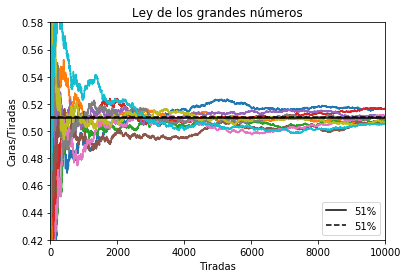

In [12]:
from matplotlib import pyplot as plt

plt.plot(tiradas_acumuladas)
plt.plot([0,10000],[tiradas_acumuladas[10000-1].mean(),tiradas_acumuladas[10000-1].mean()], 'k-', label='51%')
plt.plot([0,10000],[0.51,0.51], 'k--', label='51%')
plt.title('Ley de los grandes números')
plt.xlabel('Tiradas')
plt.ylabel('Caras/Tiradas')
plt.legend(loc='lower right')
plt.axis([0,10000, 0.42, 0.58])
plt.show()

# Voting

In [13]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.3, random_state=42)

In [14]:
help(make_moons)

Help on function make_moons in module sklearn.datasets.samples_generator:

make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.
    
    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.
    
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    Returns
    -------
    X : array of shape [n_samples, 2]
        The 

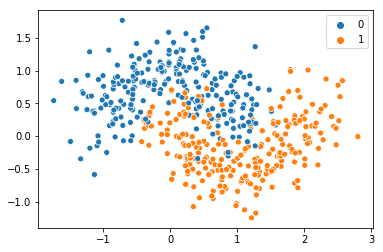

In [15]:
import seaborn as sns
sns.scatterplot(X[:,0],X[:,1], hue=y)

Vamos a separar en train y test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Hard voting
Aplicamos varios clasificadores:

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log = LogisticRegression(solver='lbfgs', random_state=42)
rnf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(gamma='scale', probability=True, random_state=42)

Los vamos a poner a votar:

In [29]:
from sklearn.ensemble import VotingClassifier
voting= VotingClassifier(estimators=[('lr',log),('rf',rnf),('svm', svm)],voting='hard')

Script que uso para visualizar la clasificación:

In [30]:
# Para ver cómo clasifica un algoritmo
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Importo una métrica:

In [31]:
from sklearn.metrics import accuracy_score

LogisticRegression 0.864


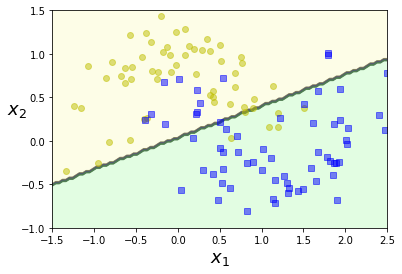

RandomForestClassifier 0.896


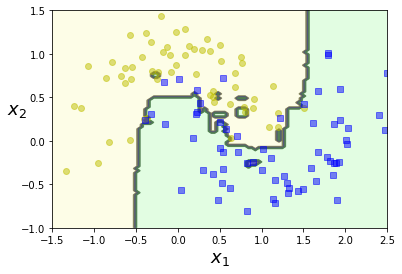

SVC 0.896


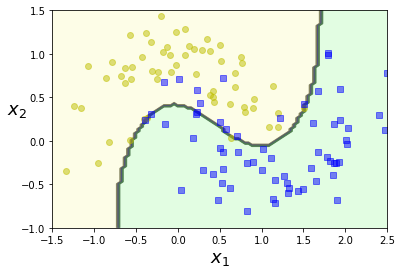

VotingClassifier 0.912


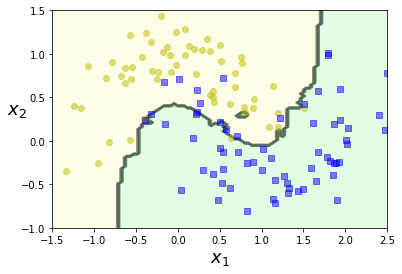

In [32]:
for clf in [log, rnf, svm, voting]:
    clf.fit(X_train,y_train) # Ajustar
    y_pred= clf.predict(X_test) # Predecir
    # Evaluar:
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))
    plot_decision_boundary(clf,X_test,y_test)
    plt.show()

## Soft voting

VotingClassifier 0.92


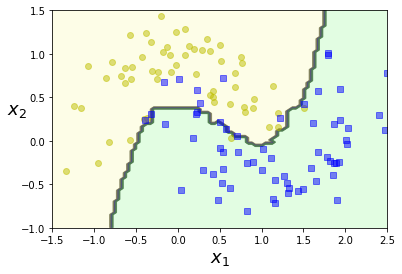

In [33]:
voting_soft= VotingClassifier(estimators=[('lr',log),('rf',rnf),('svm', svm)],voting='soft') # Definir

voting_soft.fit(X_train,y_train) # Ajustar

y_pred= voting_soft.predict(X_test) # Predecir

# Evaluar:
print(voting_soft.__class__.__name__, accuracy_score(y_test,y_pred))
plot_decision_boundary(voting_soft,X_test,y_test)

# AdaBoost

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R",
                        learning_rate=0.5, random_state=42) # Definir
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

AdaBoostClassifier 0.92


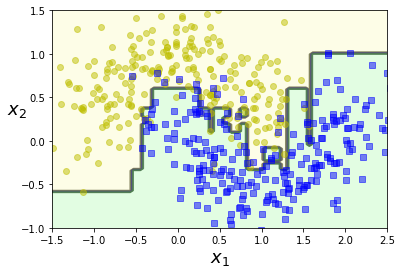

In [36]:
print(ada.__class__.__name__, accuracy_score(y_test,y_pred))
plot_decision_boundary(ada, X,y)

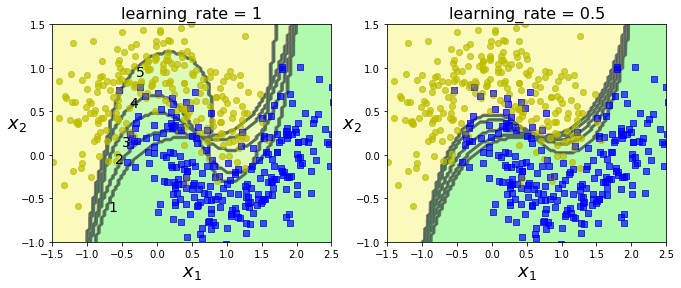

In [37]:
# Adaboost a mano
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

plt.show()

# Gradient boosting

(Regresión)

El training set:

In [38]:
np.random.seed(42)

X=np.random.rand(100,1) -0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)

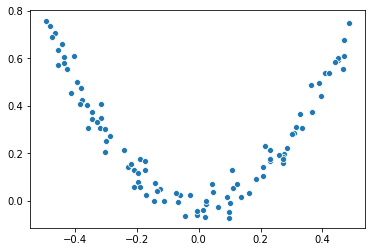

In [39]:
sns.scatterplot(X[:,0],y)

Vamos a hacer regresión con un DecisionTree

In [41]:
from sklearn.tree import DecisionTreeRegressor

## A mano

In [61]:
tree1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree1.fit(X,y)
y_pred = tree1.predict(X)

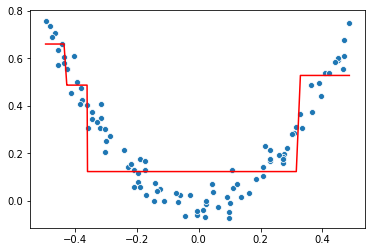

In [62]:
sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0],y_pred, color='r')

Obtenemos los residuos de esta predicción:
$r_1= y-\hat{y}$

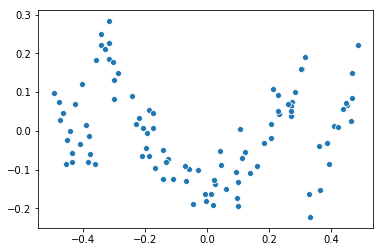

In [63]:
r1 = y- y_pred
sns.scatterplot(X[:,0],r1)

Ahora ajusto un modelo a los residuos:

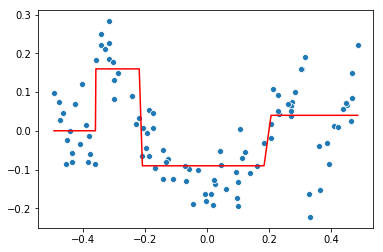

In [64]:
tree2 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree2.fit(X,r1)
r1_pred = tree2.predict(X)
sns.scatterplot(X[:,0],r1)
sns.lineplot(X[:,0],r1_pred, color='r')

La predicción que me queda de $y$ es: $y= \hat{y} + \hat{r_1}$

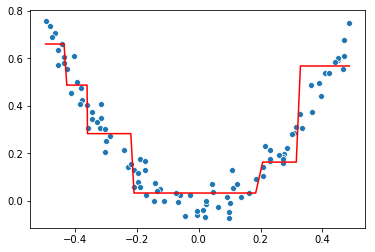

In [66]:
sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0], y_pred+r1_pred, color='r')

Nuevos residuos de los residuos:

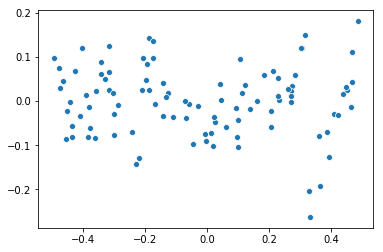

In [67]:
r2 = r1-r1_pred
sns.scatterplot(X[:,0], r2)

Predicción en los residuos de los residuos:

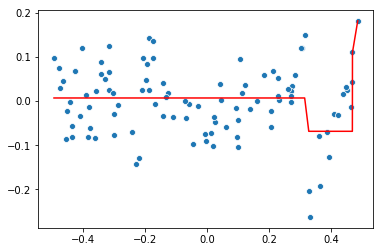

In [68]:
tree3 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree3.fit(X,r2)
r2_pred = tree3.predict(X)

sns.scatterplot(X[:,0],r2)
sns.lineplot(X[:,0], r2_pred, color='r')

Predicción de y:

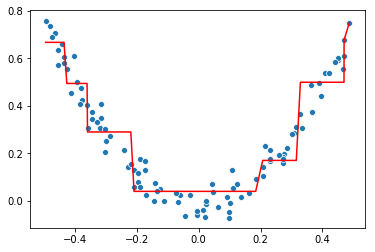

In [69]:
sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0], y_pred+r1_pred+r2_pred, color='r')

## Con scikit-learn

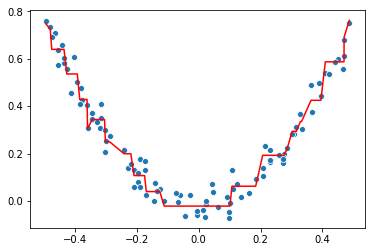

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=1,random_state=42)
gbrt.fit(X,y)
y_pred=gbrt.predict(X)

sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0],y_pred,color='r')

Si le ponemos una learning rate más lenta cambio **sesgo** (bias) por **varianza**:

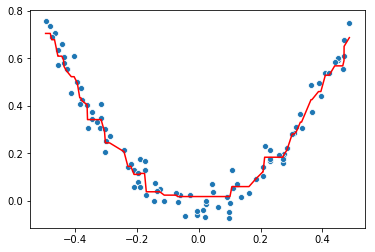

In [85]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=40, learning_rate=0.1,random_state=42)
gbrt_slow.fit(X,y)
y_pred_slow=gbrt_slow.predict(X)

sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0],y_pred_slow,color='r')

## Stochastic gradient boosting
Cada modelo puede ser entrenado con una submuestra del training data, lo que disminuya la varianza a cambio de obtener más sesgo.

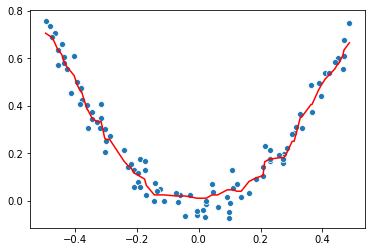

In [86]:
stoc_gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=40, learning_rate=0.1, subsample=0.25, random_state=42)
stoc_gbrt.fit(X,y)
y_pred=stoc_gbrt.predict(X)

sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0],y_pred,color='r')

## Extreme gradient boosting
Una versión optimizada del gradient boosting

In [87]:
import xgboost

[12:36:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


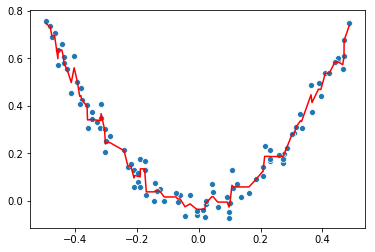

In [88]:
xgb = xgboost.XGBRegressor()
xgb.fit(X,y)
y_pred = xgb.predict(X)

sns.scatterplot(X[:,0],y)
sns.lineplot(X[:,0],y_pred,color='r')

## Con split en test y train
Vamos a probar los distintos algoritmos que hemos visto separando en training y test:

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

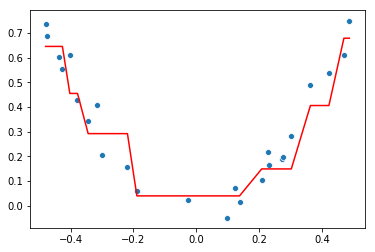

In [90]:
gbrt= GradientBoostingRegressor(max_depth=2,n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X_train, y_train)
y_pred=gbrt.predict(X_val)

sns.scatterplot(X_val[:,0],y_val)
sns.lineplot(X_val[:,0],y_pred, color='r')

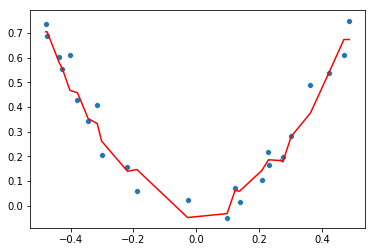

In [91]:
gbrt_slow= GradientBoostingRegressor(max_depth=2,n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)
y_pred=gbrt_slow.predict(X_val)

sns.scatterplot(X_val[:,0],y_val)
sns.lineplot(X_val[:,0],y_pred, color='r')

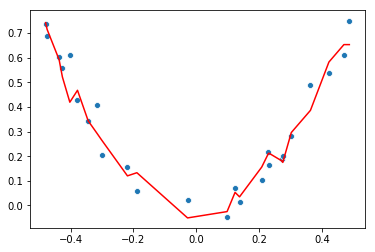

In [93]:
gbrt_stoc= GradientBoostingRegressor(max_depth=2,n_estimators=200, learning_rate=0.1, subsample=0.25, random_state=42)
gbrt_stoc.fit(X_train, y_train)
y_pred=gbrt_stoc.predict(X_val)

sns.scatterplot(X_val[:,0],y_val)
sns.lineplot(X_val[:,0],y_pred, color='r')

[12:41:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


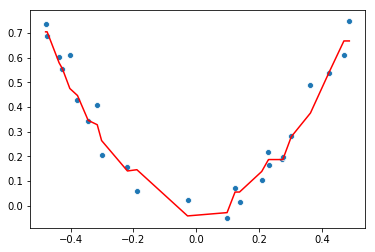

In [94]:
xgb= xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_val)

sns.scatterplot(X_val[:,0],y_val)
sns.lineplot(X_val[:,0],y_pred, color='r')